In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
n_samples_total = 10000
n_features = 70
n_informative = 60
n_redundant = 4
n_classes = 6
n_clusters_per_class = 2

X, y = make_classification(
    n_samples=n_samples_total,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_classes=n_classes,
    n_clusters_per_class=n_clusters_per_class,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)
n_classes = len(np.unique(y))
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
n_classes = y_test_bin.shape[1]


In [7]:
classifiers = {
    "Perceptron": OneVsRestClassifier(Perceptron()),
    "Decision Tree": OneVsRestClassifier(DecisionTreeClassifier()),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
}

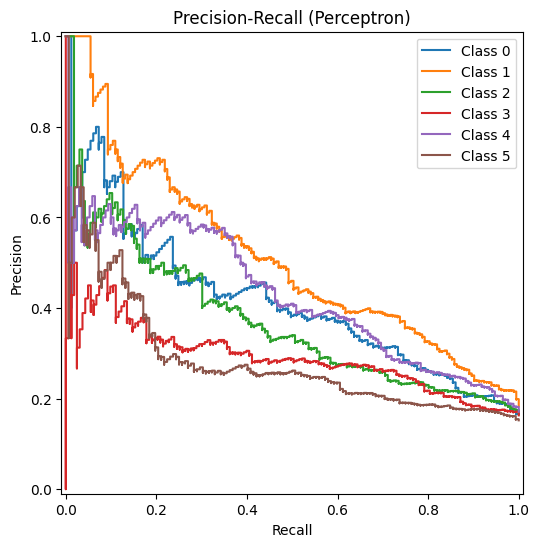

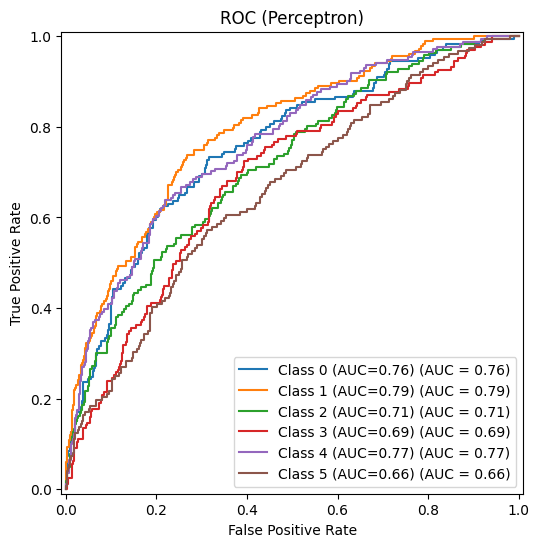

c:\Users\nikit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\multiclass.py:551: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


ValueError: Input contains NaN.

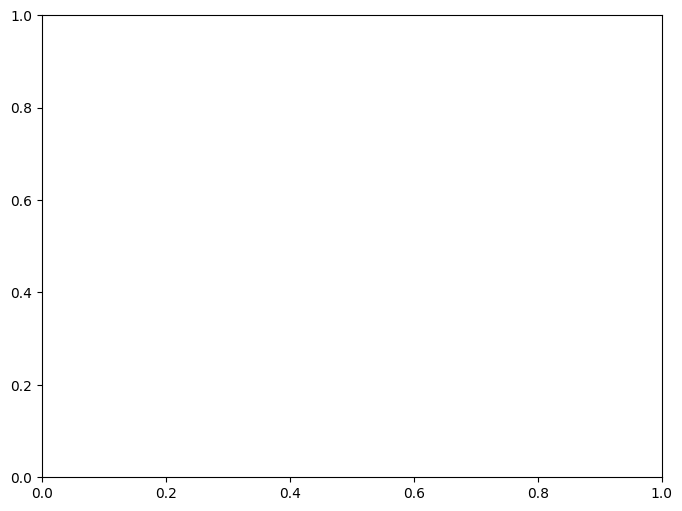

In [9]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, roc_curve, auc, RocCurveDisplay

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Получение scores
    try:
        y_score = clf.decision_function(X_test)
    except AttributeError:
        y_score = clf.predict_proba(X_test)
    
    # Если 1 класс (бинарный случай), reshape scores
    if y_score.ndim == 1:
        y_score = y_score.reshape(-1, 1)
    
    # Precision-Recall кривая
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        display = PrecisionRecallDisplay(
            recall=recall, 
            precision=precision, 
            estimator_name=f"Class {i}"
        )
        display.plot(ax=ax)
    ax.legend(loc="best")
    ax.set_title(f"Precision-Recall ({name})")
    plt.show()

    # ROC-кривая
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(
            fpr=fpr,
            tpr=tpr,
            roc_auc=roc_auc,
            estimator_name=f"Class {i} (AUC={roc_auc:.2f})"
        )
        display.plot(ax=ax)
    ax.legend(loc="lower right")
    ax.set_title(f"ROC ({name})")
    plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt


In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt


In [ ]:
plot_learning_curve(LogisticRegression(max_iter=1000), "Learning Curve (Logistic Regression)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()